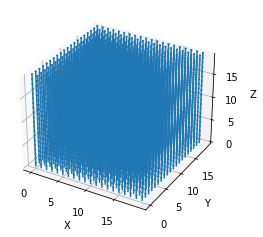

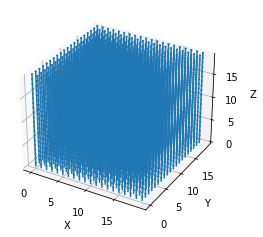

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 20  # Number of grid points in x-direction
ny = 20  # Number of grid points in y-direction
nz = 20  # Number of grid points in z-direction
dx = 1.0  # Grid spacing in x-direction
dy = 1.0  # Grid spacing in y-direction
dz = 1.0  # Grid spacing in z-direction
dt = 50  # Time step
tmax = 100.0  # Maximum simulation time
alpha = 0.1  # Damping coefficient
gamma = 1.0  # Gyromagnetic ratio

# Initial magnetization
mx = np.zeros((nx, ny, nz))
my = np.zeros((nx, ny, nz))
mz = np.ones((nx, ny, nz))
m_norm = np.sqrt(mx**2 + my**2 + mz**2)
mx /= m_norm
my /= m_norm
mz /= m_norm

# External magnetic field
Hx = np.zeros((nx, ny, nz))
Hy = np.zeros((nx, ny, nz))
Hz = np.ones((nx, ny, nz))

# Effective magnetic field
H_eff_x = gamma * (my * Hz - mz * Hy)
H_eff_y = gamma * (mz * Hx - mx * Hz)
H_eff_z = gamma * (mx * Hy - my * Hx)

# Main loop
t = 0.0
while t < tmax:
    # Compute new magnetization
    mx_new = (1 - alpha**2) * mx + 2 * alpha / (1 + alpha**2) * (dt * gamma * (my * H_eff_z - mz * H_eff_y) + my * (1 - alpha**2) * mx - alpha * dt * (my**2 + mz**2) * mx)
    my_new = (1 - alpha**2) * my + 2 * alpha / (1 + alpha**2) * (dt * gamma * (mz * H_eff_x - mx * H_eff_z) + mz * (1 - alpha**2) * my - alpha * dt * (mz**2 + mx**2) * my)
    mz_new = (1 - alpha**2) * mz + 2 * alpha / (1 + alpha**2) * (dt * gamma * (mx * H_eff_y - my * H_eff_x) + mz * (1 - alpha**2) * mz - alpha * dt * (mx**2 + my**2) * mz)

    # Normalize magnetization
    m_norm = np.sqrt(mx_new**2 + my_new**2 + mz_new**2)
    mx_new /= m_norm
    my_new /= m_norm
    mz_new /= m_norm

    # Update magnetization
    mx = mx_new
    my = my_new
    mz = mz_new

    # Update effective magnetic field
    H_eff_x = gamma * (my * Hz - mz * Hy)
    H_eff_y

    # Update time
    t += dt

    ax = plt.axes(projection='3d')
    X, Y, Z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz))
    ax.quiver(X, Y, Z, mx, my, mz, length=1, normalize=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    
    
